   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  


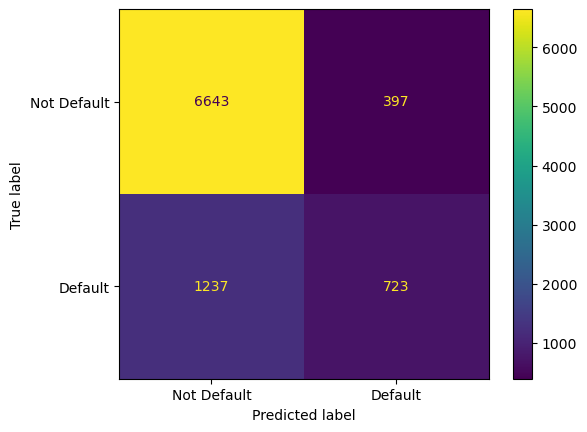

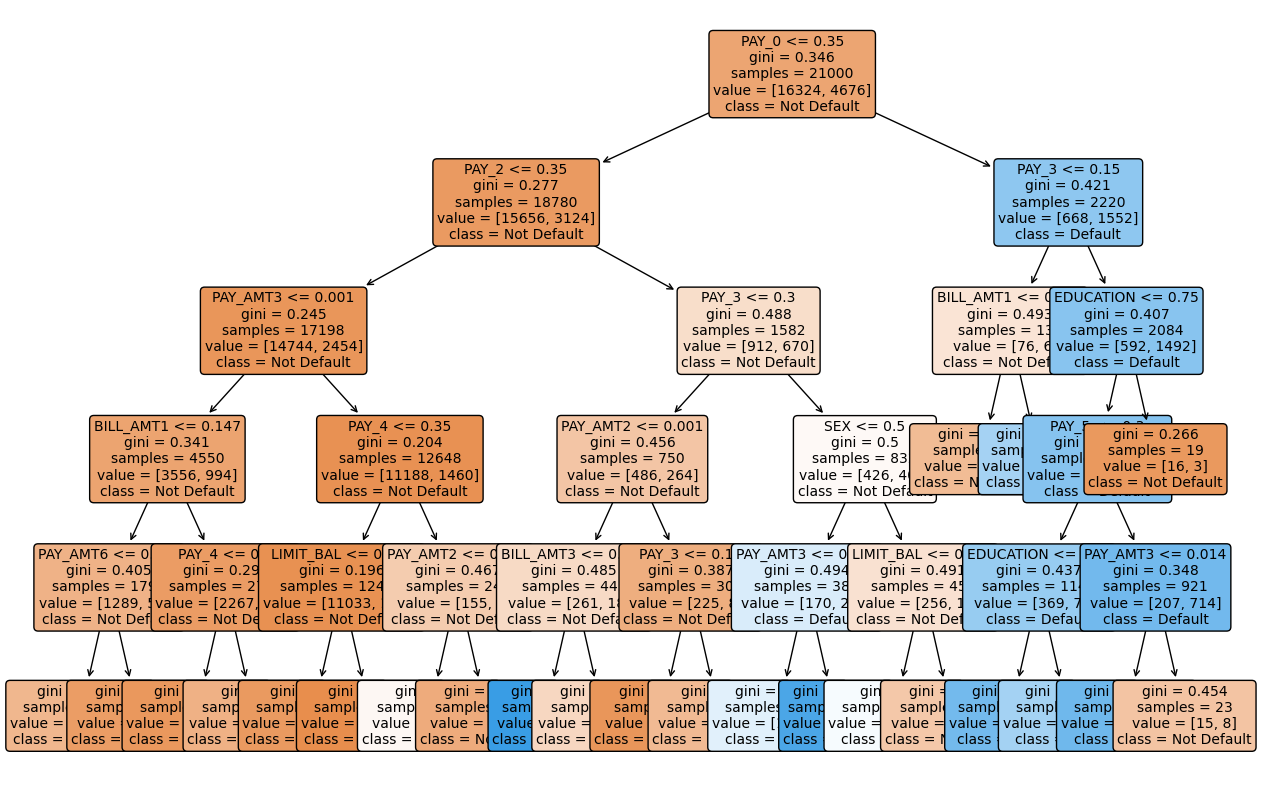

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Load the dataset
data = pd.read_csv('UCI_Credit_Card.csv')

# Print the first 5 rows of the dataset
print(data.head())

# Get the summary statistics of the dataset
print(data.describe())

# Check for missing values in each column
data.isnull().sum()

# remove the "ID" attribute
data = data.drop(['ID'], axis=1)

# count the number of samples in each class
sample_counts = data['default'].value_counts()

# calculate the true/false ratio
true_ratio = sample_counts[1] / len(data)
false_ratio = sample_counts[0] / len(data)

print(f'True Ratio: {true_ratio:.2%}')
print(f'False Ratio: {false_ratio:.2%}')

# Split data into features and target variable
X = data.drop('default', axis=1)
y = data['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the decision tree model with pruning
dtm = DecisionTreeClassifier(criterion='gini',min_samples_split=100,max_depth=5,random_state=42)
dtm.fit(X_train, y_train)

# Make predictions
dtm_y_pred = dtm.predict(X_test)

# Evaluate the performance of the model
accuracy = dtm.score(X_test,y_test) * 100
print("Accuracy using Decision Tree:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(dtm, X_test, y_test, display_labels=['Not Default', 'Default'])
plt.show()

# Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(dtm, feature_names=X.columns, class_names=['Not Default', 'Default'], filled=True, rounded=True, fontsize=10)
plt.show()